In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


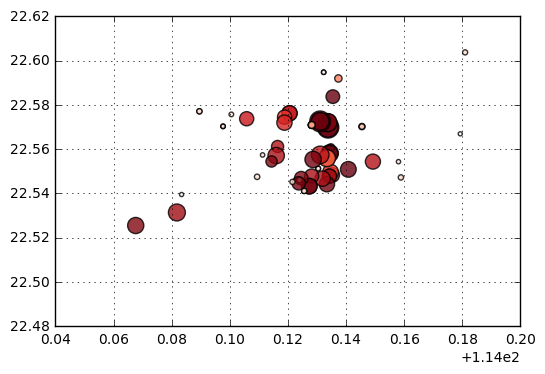

In [3]:
data = pd.read_csv(r'C:\Users\acer\Documents\Tencent Files\1970237873\FileRecv\CLASSDATA_ch04进阶算法学习：统计分析能力强化\CH01数据特征分析\深圳罗湖二手房信息.csv',engine = 'python')
plt.scatter(data['经度'],data['纬度'],
           s = data['房屋单价']/400,
           c = data['参考总价'],
           cmap = 'Reds',
           alpha = 0.8)
plt.grid()
data.head()

In [12]:
#极差
def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return(krange)

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print('%s的极差为%f \n%s的极差为%f'%(key1,dr[0],key2,dr[1]))

参考首付的极差为52.500000 
参考总价的极差为175.000000


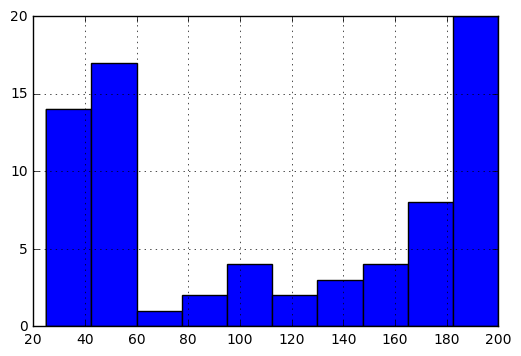

In [19]:
#频率分布情况
data[key2].hist(bins = 10)

In [26]:
#频率分组
gcut = pd.cut(data[key2],10,right = False)
gcut_count = gcut.value_counts(sort = False)
data['%s的分组区间'% key2] = gcut.values
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价的分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165, 182.5)"


In [71]:
#区间出现频率
g_f = pd.DataFrame(gcut_count)
g_f.rename(columns = {gcut_count.name:'频数'},inplace = True)
g_f['频率'] = g_f['频数'] / g_f['频数'].sum()
g_f['累计频率'] = g_f['频率'].cumsum()
g_f['频率%'] = g_f['频率'].apply(lambda x :"%.2f%%"%(x*100))
g_f['累计频率%'] = g_f['累计频率'].apply(lambda x :"%.2f%%"%(x*100))
g_f
g_f.style.bar(subset = ['频率','频率累计'])


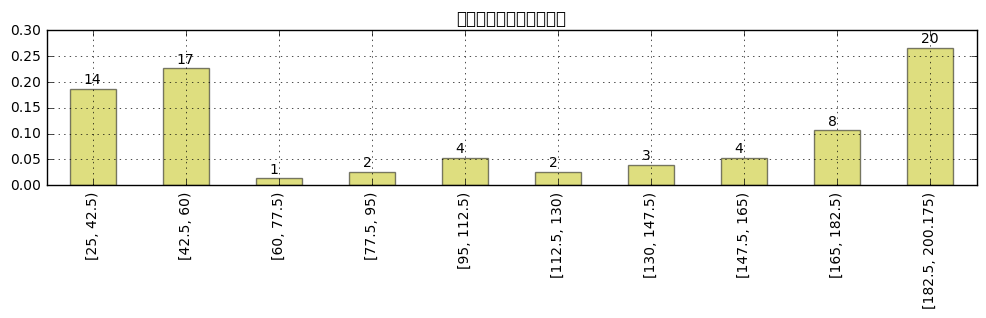

In [78]:
#直方图
g_f['频率'].plot(kind = 'bar',
              figsize = (12,2),
              color = 'y',
              grid = True,
              alpha = 0.5)

plt.title('参考总价分布频率直方图')

x = len(g_f)
y = g_f['频率']
m = g_f['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')
# 添加频数标签